In [5]:
import numpy as np 
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [87]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
Y = df.loc[:,['species']].values

## Data Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## Covariance Matrix
Variance --> variation of a single random variable (e.g. the weight of a person)

Covariance --> how much two random variables vary (e.g. weight and height).

In [89]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## Eigendecomposition

In [90]:
values, vectors = np.linalg.eig(cov_matrix)
values[:]

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [91]:
vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [92]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

print(explained_variances)

[0.7277045209380134, 0.23030523267680644, 0.03683831957627389, 0.005151926808906267]


## visualizing

In [93]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = Y
res

,PC1,PC2,Y
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa
...,...,...,...
145,1.870522,-0.382822,virginica
146,1.558492,0.905314,virginica
147,1.520845,-0.266795,virginica
148,1.376391,-1.016362,virginica


<AxesSubplot:xlabel='PC1'>

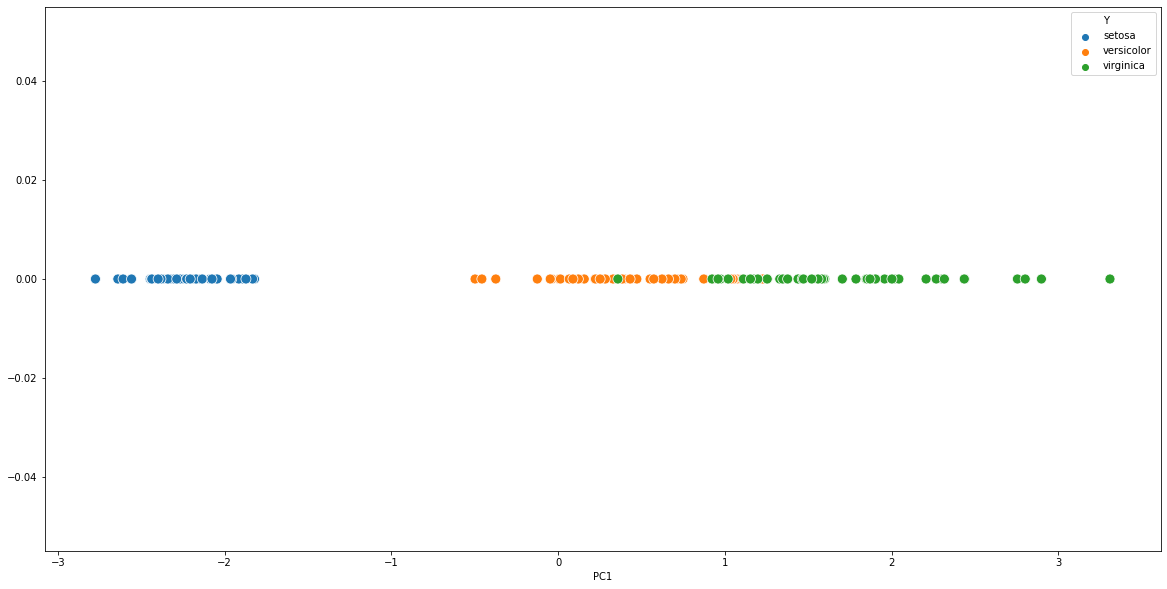

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=100)


## USING LIBRARY

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [116]:
res2 = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
res2['Y'] = Y
res2

,PC1,PC2,Y
0,-2.684207,0.326607,setosa
1,-2.715391,-0.169557,setosa
2,-2.889820,-0.137346,setosa
3,-2.746437,-0.311124,setosa
4,-2.728593,0.333925,setosa
...,...,...,...
145,1.944017,0.187415,virginica
146,1.525664,-0.375021,virginica
147,1.764046,0.078519,virginica
148,1.901629,0.115877,virginica


150
150


<AxesSubplot:xlabel='PC1'>

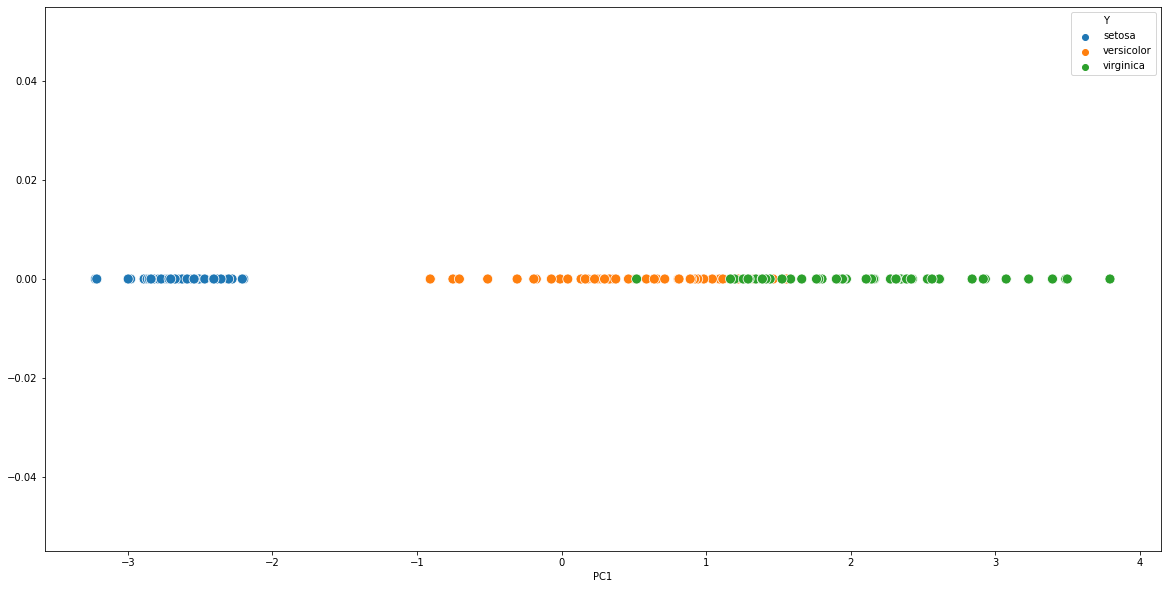

In [118]:
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
plt.figure(figsize=(20, 10))
print(len(res2))
print(len(res2['Y']))
sns.scatterplot(res2['PC1'], [0] * len(res2), hue=res2['Y'], s=100)